<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
house = pd.read_csv('../DATA/Family_Income_and_Expenditure.csv')
print(house.head())

   Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   

  Main Source of Income  Agricultural Household indicator  \
0         Wage/Salaries                                 0   
1         Wage/Salaries                                 0   
2         Wage/Salaries                                 1   
3         Wage/Salaries                                 0   
4         Wage/Salaries                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182      

In [11]:
# Head
house.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [12]:
# Tail
house.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# Shape
house.shape

(41544, 60)

In [14]:
# Data Types
house.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

<AxesSubplot:ylabel='Frequency'>

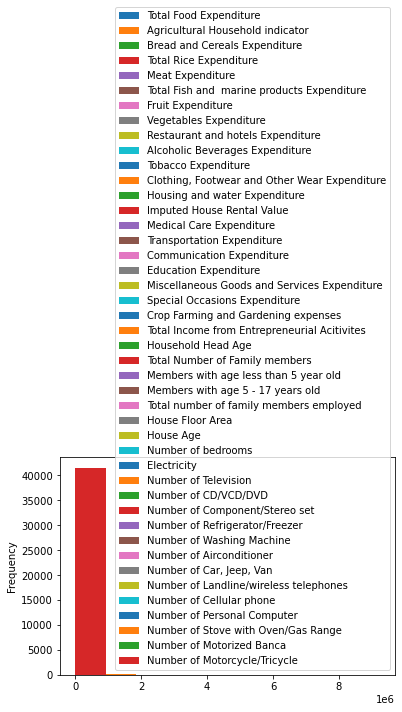

In [16]:
house.plot(kind='hist', x='Total Household Income')

##### 2. How would you describe the shape of this population?

**ANSWER:**

In [17]:
house.shape

(41544, 60)

##### 2. What is the mean income of this population?

In [18]:
# ANSWER
house.mean()

Total Household Income                           247555.584802
Total Food Expenditure                            85099.158194
Agricultural Household indicator                      0.429858
Bread and Cereals Expenditure                     25133.723642
Total Rice Expenditure                            18195.825005
Meat Expenditure                                  10540.072574
Total Fish and  marine products Expenditure       10529.318337
Fruit Expenditure                                  2550.474990
Vegetables Expenditure                             5006.918568
Restaurant and hotels Expenditure                 15436.566075
Alcoholic Beverages Expenditure                    1085.068121
Tobacco Expenditure                                2294.736183
Clothing, Footwear and Other Wear Expenditure      4954.621076
Housing and water Expenditure                     38375.467793
Imputed House Rental Value                        20921.544627
Medical Care Expenditure                           7160

In [19]:
house['Total Household Income'].mean()

247555.58480165608

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**

In [21]:
#mean (average)—of a population from random samples of the population. or Standard deviation

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [30]:
# ANSWER
house.sample(n=10)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
27190,245869,III - Central Luzon,83827,Wage/Salaries,0,20493,12353,10096,13449,1059,...,0,0,0,0,0,2,0,0,0,0
29983,737634,IVA - CALABARZON,184634,Wage/Salaries,0,28482,19000,14850,24299,3020,...,1,1,0,0,1,3,1,0,0,0
22943,94651,VI - Western Visayas,67053,Wage/Salaries,0,21270,14300,9345,8735,1285,...,0,0,0,0,0,2,0,0,0,1
6087,174395,II - Cagayan Valley,34400,Wage/Salaries,1,12985,10568,5809,5977,720,...,1,0,0,0,0,1,0,0,0,0
34466,173445,Caraga,53970,Wage/Salaries,1,26014,25200,6218,5670,1405,...,0,0,0,0,0,1,0,0,0,0
9921,325750,VII - Central Visayas,122836,Other sources of Income,0,22617,17014,11154,7922,1752,...,1,1,1,0,0,3,1,1,0,0
27740,270963,III - Central Luzon,91928,Wage/Salaries,0,22917,18438,16679,8154,2160,...,0,1,0,0,0,3,0,0,0,1
33557,177230,ARMM,110871,Enterpreneurial Activities,1,41271,30475,685,39745,2400,...,0,0,0,0,0,0,0,0,0,0
7129,200205,V - Bicol Region,126275,Wage/Salaries,1,57280,52128,11280,9030,2179,...,0,1,0,0,0,2,0,1,0,0
28962,140547,I - Ilocos Region,75438,Enterpreneurial Activities,1,28640,26055,6748,5391,2269,...,1,0,0,0,0,1,0,0,0,1


# 4.A Make a histogram of all the sample means

(array([40.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.31186212e-02, 2.47555703e+04, 4.95111275e+04, 7.42666846e+04,
        9.90222418e+04, 1.23777799e+05, 1.48533356e+05, 1.73288913e+05,
        1.98044470e+05, 2.22800028e+05, 2.47555585e+05]),
 <BarContainer object of 10 artists>)

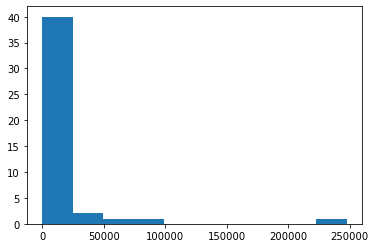

In [27]:
# ANSWER
plt.hist(house.mean())

###### 4.B Describe the shape of the histogram.

**ANSWER:**

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

In [28]:
# ANSWER
house.sample(n=1000, random_state=15)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
34230,174720,Caraga,70546,Enterpreneurial Activities,0,27191,22680,6344,8950,1340,...,1,1,0,0,0,6,1,0,0,1
13721,163109,I - Ilocos Region,46277,Other sources of Income,0,10967,7415,10918,7952,435,...,0,0,0,0,0,0,0,0,0,0
18682,52679,VIII - Eastern Visayas,14676,Other sources of Income,0,7113,6454,243,2279,622,...,0,0,0,0,0,0,0,0,0,0
20554,220700,NCR,90090,Wage/Salaries,0,14697,12268,12930,7759,620,...,0,0,0,0,0,2,0,0,0,0
3396,260633,CAR,42098,Other sources of Income,0,11171,8200,5350,4840,4100,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30996,425877,VIII - Eastern Visayas,94837,Wage/Salaries,0,26289,19425,20396,12360,4300,...,1,0,0,0,0,2,0,0,1,0
4622,47636,X - Northern Mindanao,25230,Other sources of Income,0,13653,5187,540,4584,560,...,0,0,0,0,0,1,0,0,0,0
5090,204755,X - Northern Mindanao,59741,Wage/Salaries,0,16147,13350,6053,9124,2248,...,1,1,0,0,0,2,2,0,0,1
22161,256400,X - Northern Mindanao,61996,Wage/Salaries,0,19673,14699,5090,6211,995,...,0,0,0,0,0,2,0,0,0,0


##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

In [31]:
# ANSWER
house.sample(n=1000, random_state=50)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
19589,290559,VIII - Eastern Visayas,108532,Wage/Salaries,0,30593,20363,13440,11536,6436,...,1,0,0,0,0,5,1,0,0,1
17116,253167,IVA - CALABARZON,63625,Wage/Salaries,0,15731,11076,11322,9190,1580,...,0,0,0,0,0,2,0,0,0,0
9869,335564,VII - Central Visayas,224774,Other sources of Income,0,47396,32760,30754,14450,7362,...,1,1,0,0,1,8,2,1,0,0
8309,105286,V - Bicol Region,60689,Wage/Salaries,0,17254,11584,7878,3770,164,...,0,0,0,0,0,2,0,0,0,0
26110,350958,II - Cagayan Valley,45767,Other sources of Income,0,7182,1040,900,1165,2640,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8682,307087,IVA - CALABARZON,78986,Other sources of Income,0,15092,10620,16278,7086,2125,...,0,1,1,0,1,2,3,1,0,0
2972,153250,IVA - CALABARZON,53199,Other sources of Income,0,21254,12922,11996,7972,515,...,1,0,0,0,0,0,0,0,0,0
6775,252556,II - Cagayan Valley,141985,Enterpreneurial Activities,0,44500,19760,28676,17860,8140,...,0,0,0,0,0,4,0,0,0,2
40224,36716,III - Central Luzon,11794,Other sources of Income,2,4728,2500,550,1860,428,...,0,0,0,0,0,0,0,0,0,0


###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**

###### 8.B What is mean of the distribution of sample means?

In [ ]:
# ANSWER

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**